In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-


# Deep Neural Networks

## Session 07b
### Neural Network with :
- pytorch implementation
- One hidden layer 
- ${Tanh}$ activation function
- multi-class - Fashion MNIST dataset (all 60000 images)


<img src='../../images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>

In [2]:
# Lets import some libraries
import os

import torch
#import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

import time

%matplotlib inline

In [3]:
# Some basic parameters
inpDir = '../input'
outDir = '../output'
modelDir = '../models'
modelSubDir = 'pytorch_fashion'

RANDOM_STATE = 24

torch.manual_seed(RANDOM_STATE) # Set Random Seed for reproducible  results

EPOCHS = 15001 # number of epochs
ALPHA = 0.1 # learning rate
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

CMAP = 'brg' # plt.cm.Spectral

plt.rcParams.update(params)

In [4]:
# Check if all directories are present
if not os.path.exists(os.path.join(outDir)):
    os.makedirs(os.path.join(outDir))
    print ('Created {} directory'.format(outDir))

if not os.path.exists(os.path.join(modelDir, modelSubDir)):
    os.makedirs(os.path.join(modelDir, modelSubDir))
    print ('Created {} directory'.format(os.path.join(modelDir, modelSubDir)))

## Helper Function to Plot Loss and accuracy

In [5]:
def plot_hist(hist_df):
    
    fig, axes = plt.subplots(1,2 , figsize = (15,6),)

    l_range = 5 # ignoring first few records
    x_var = hist_df.columns[0] # first colum is epoch
    y1_var = hist_df.columns[1] # Train loss
    y2_var = hist_df.columns[2] # Test loss

    ax = axes[0]

    loss_df[l_range:].plot(x = x_var, y = [y1_var, y2_var], ax = ax)

    # get values for plotting
    st_loss = hist_df[y1_var].iloc[0]
    end_loss = hist_df[y1_var].iloc[-1]
    t_st_loss = hist_df[y2_var].iloc[0]
    t_end_loss = hist_df[y2_var].iloc[-1]

    # little beautification
    train_txtstr = "Train Loss: \n  Start : {:7.4f}\n    End : {:7.4f}".format( st_loss, end_loss )    # Train text to plot

    test_txtstr = "Test Loss: \n  Start : {:7.4f}\n    End : {:7.4f}".format( t_st_loss, t_end_loss ) # Test text to plot
    txtstr = ' {} \n{}'.format(train_txtstr, test_txtstr)
    # properties  matplotlib.patch.Patch 
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords

    ax.text(0.4, 0.95, txtstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=props)

    ax.set_xlabel(x_var)
    ax.set_ylabel(y1_var)
    ax.set_title('Overall')
    ax.grid();

    ax = axes[1]

    y1_var = hist_df.columns[3] # Train Accuracy
    y2_var = hist_df.columns[4] # Test Accuracy

    loss_df[l_range:].plot(x = x_var, y = [y1_var, y2_var], ax = ax)

    # get values for plotting
    st_loss = hist_df[y1_var].iloc[0]
    end_loss = hist_df[y1_var].iloc[-1]
    t_st_loss = hist_df[y2_var].iloc[0]
    t_end_loss = hist_df[y2_var].iloc[-1]

    # little beautification
    train_txtstr = "Train Accuracy: \n  Start : {:7.4f}\n    End : {:7.4f}".format( st_loss, end_loss )    # Train text to plot

    test_txtstr = "Test Accuracy: \n  Start : {:7.4f}\n    End : {:7.4f}".format( t_st_loss, t_end_loss ) # Test text to plot# properties  matplotlib.patch.Patch 
    txtstr = ' {} \n{}'.format(train_txtstr, test_txtstr)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords

    ax.text(0.4, 0.95, txtstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=props)

    ax.set_xlabel(x_var)
    ax.set_ylabel(y1_var)
    ax.set_title('Accuracies'.format(l_range))
    ax.grid();
    plt.tight_layout()

## Generate Data Set

Loading Fashion MNIST Dataset

In [6]:
train_filename = os.path.join(inpDir, 'fashion_mnist', 'fashion-mnist_train.csv')
test_filename = os.path.join(inpDir, 'fashion_mnist', 'fashion-mnist_test.csv')

train_df = pd.read_csv(train_filename, header = 0)
test_df = pd.read_csv(test_filename, header = 0)

In [7]:
y_train = train_df.label.to_numpy()
X_train = train_df.drop('label', axis = 1).to_numpy()

y_test = test_df.label.to_numpy()
X_test = test_df.drop('label', axis = 1).to_numpy()

In [8]:
# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
labels= {0 : 'T-shirt/top',
         1  : 'Trouser',
         2  : 'Pullover',
         3 : 'Dress',
         4 : 'Coat',
         5 : 'Sandal',
         6 : 'Shirt',
         7 : 'Sneaker',
         8 : 'Bag',
         9 : 'Ankle boot'}

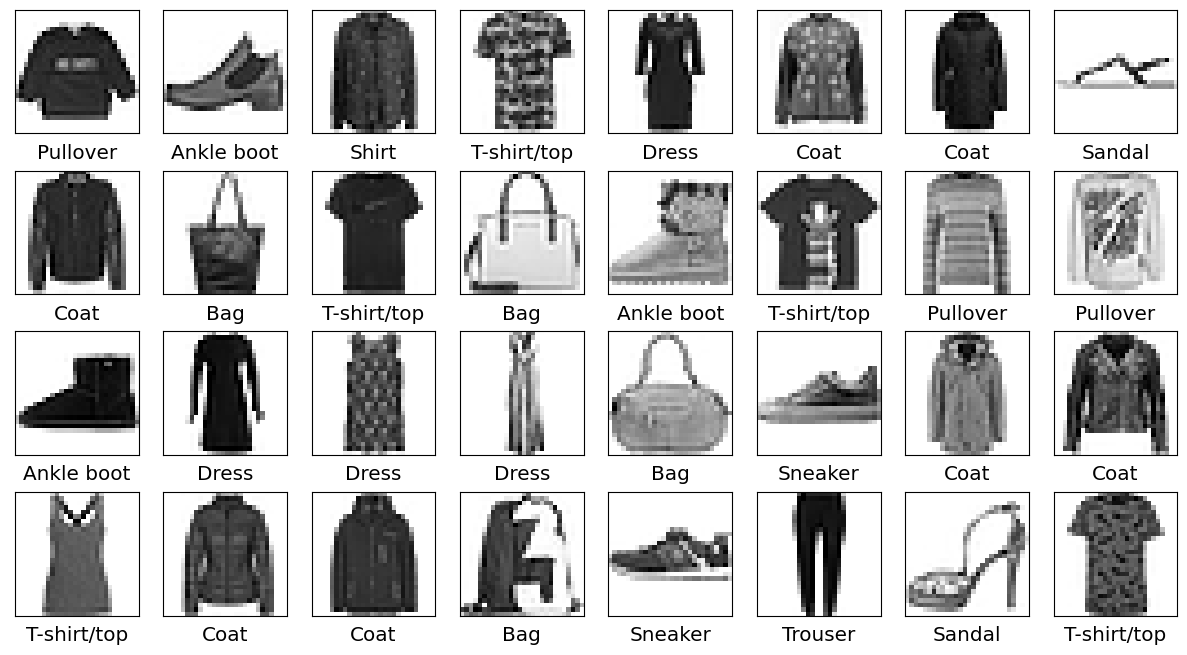

In [10]:
plt.figure(figsize=(15,8))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28,28,1), cmap=plt.cm.binary)
    plt.xlabel(labels[y_train[i]])
plt.show()

In [11]:
y_train = pd.get_dummies(y_train).values
y_train.shape

(60000, 10)

In [12]:
y_test = pd.get_dummies(y_test).values
y_test.shape

(10000, 10)

In [13]:
# Converting to Tensor and move over to GPU
# For faster run, you may want to reduce training examples
X_train_tensor = torch.tensor(X_train).cuda()
#X_train_tensor = torch.tensor(X_train[:10000]).cuda()
X_test_tensor = torch.tensor(X_test).cuda()

y_train_tensor = torch.tensor(y_train).cuda()
#y_train_tensor = torch.tensor(y_train[:10000]).cuda()
y_test_tensor = torch.tensor(y_test).cuda()

In [14]:
28*28

784

In [15]:
X_train_tensor.shape

torch.Size([60000, 784])

In [16]:
type(X_train_tensor)

torch.Tensor

## Activation Functions

### Softmax Function


$\sigma(z_i) = \dfrac{e^{(z_i)}}{\sum_{j=1}^{K}e^{z_j}}$


In [17]:
# Activation function for output layer

def fn_softmax(z: torch.Tensor):
    
    '''
    Args:
        z : np.ndarray, shape (m, n_output)
    returns:
        probabilities of each class
    
    '''
    
    exp_sc = torch.exp(z)
    
    return exp_sc / torch.sum( exp_sc, dim = 1, keepdim= True)    

In [18]:
sm = fn_softmax(torch.tensor([[8, 5, 0]]))
print (sm)

tensor([[9.5227e-01, 4.7411e-02, 3.1945e-04]])


In [19]:
sm = fn_softmax(torch.tensor([[-10, 0., 10]]))
print (sm)

tensor([[2.0611e-09, 4.5398e-05, 9.9995e-01]])


### Other Activation Function

In [20]:
def fn_activ(z: torch.Tensor):
    '''
        Args:
           z : array, Aggregated values 
       Return:
           Activations for each z
    '''

    return torch.tanh(z)

def fn_activ_prime(z: torch.Tensor):
    '''
        Args:
           z : array, Aggregated values 
       Return:
           Derivative, for each z
    '''

    return 1.0 - torch.tanh(z)**2

### Is ourActivation Function working?

In [21]:
torch.tanh(torch.tensor(0.5))

tensor(0.4621)

In [22]:
(1 - torch.float_power(torch.tanh(torch.tensor(0.5)), 2))

tensor(0.7864, dtype=torch.float64)

In [23]:
fn_activ_prime(torch.tensor(0.5))

tensor(0.7864)

## Loss Function

We need to minimize the error by adjusting ($Ws, bs$). We call the function that measures our error the <b>loss function</b>. A common choice with the sigmoid output is the cross-entropy loss. The loss for predictions $\hat{y}$ with respect to the true labels $y$ is given by:

$
\begin{aligned}
L(\hat{y_i}, y_i) =  -[y_i.log\hat{y_i} + (1 - y_i) . log(1-\hat{y_i})]
\end{aligned}
$

For all samples:

$
\begin{aligned}
J(\hat{y}, y) =  -\frac{1}{m}\sum_{i=1}^{m}[y_i.log\hat{y}_i + (1-y_i) . log(1-\hat{y}_i)]
\end{aligned}
$


We can use gradient descent to find its minimum. For purpose of this Session, let's use it in its simplest form - <b>batch gradient descent with fixed learning rate</b>.

### Loss Function

In [24]:
# Helper function to evaluate the total loss on the dataset

def calculate_loss(model, 
                   X_l:torch.Tensor, 
                   y_l:torch.Tensor):
    '''
    Args:
        model: dictionay object containing weights and biases
        X_l: Feature Matrix to calculate loss
        y_y: Labels array to calculate loss
    Returns:
        Average loss
    '''
    
    # extract weights and losses from the model
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    data_loss = 0
    
    # Number of examples
    m = X_l.shape[0]
    # Forward propagation to calculate our predictions
    # Layer 1
    z1 = torch.matmul(X_l, W1) + b1
    
    # Activation
    a1 = fn_activ(z1)
    
    # Layer 2
    z2 = torch.matmul(a1, W2) + b2
    
    # sigmoid  activation
    a2 = fn_softmax(z2)
    
    # Calculating the loss
    data_loss = -(y_l * torch.log(a2) + (1 - y_l) * torch.log(1 - a2)).sum()

    return 1./m * data_loss

## Predict Function

For predictions, we will simply be using the forward propagation. No need to iterate or calculate the back propagation for supervised learning.


In [25]:
# Helper function to predict an output (0 or 1)

def predict(model, X_p:torch.Tensor):
    '''
     Args:
         model
         X_p: input features
    Returns:
        Predictions against the instances
         
    '''
    
    X_p = X_p.float().cuda()
    
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Layer 1
    z1 = torch.matmul(X_p, W1) + b1
    
    # Activation
    a1 = fn_activ(z1)
    
    # Layer 2
    z2 = torch.matmul(a1, W2) + b2
    
    # sigmoid  activation
    a2 = fn_softmax(z2)
    
    return torch.argmax(a2, axis =1) # pick with one with highest probabilities

## Back-propagation for all Rows
For all rows, equations will remain same and the values will be divided by <b><i>'m'</i></b>; number of samples.

$
\begin{aligned}
\partial{z^{[2]}}  & = a^{[2]} - y  \\
\partial{W^{[2]}}  & = \frac{1}{m} a^{[1]T}\circ \partial{z^{[2]}} \\
\partial{b^{[2]}}  & = \frac{1}{m} \mathrm{np.sum}(\partial{z^{[2]}}, axis = 0, keepdims = True) \\
\\
\partial{z^{[1]}}  & = \partial{z^{[2]}}\circ  W^{[2]T} * ( 1-a^{[1]}**2)\\
\partial{W^{[1]}}  & = \frac{1}{m} X^{T}\circ \partial{z^{[1]}} \\
\partial{b^{[1]}}  & = \frac{1}{m} \mathrm{np.sum}(\partial{z^{[1]}}, axis = 0, keepdims = True) \\
\\
\end{aligned}
$

## Prepare Model:

In [26]:
def build_model(nn_hdim, 
                X :torch.Tensor, y :torch.Tensor, 
                X_t :torch.Tensor, y_t :torch.Tensor, 
                epochs = EPOCHS, 
                alpha = ALPHA,
                print_loss=False):
    
    '''
    Args:
        nn_hdim : Number of nodes in the hidden layer
        X : Training features to train
        y : Trainig targets (labels)
        epochs : Number of passes through the training data for gradient descent
        alpha : learning rate
        print_loss : If True, print the loss every nnn iterations
        
    Returns:
        Model: Dictionary object containing weights and biases
    '''
    
    # Initialize the parameters to random values. We need to learn these.
    # Weights
    W1 = torch.rand(nn_input_dim, nn_hdim) / torch.sqrt(torch.tensor(nn_input_dim))
    W2 = torch.rand(nn_hdim, nn_output_dim) / torch.sqrt(torch.tensor(nn_hdim))
    # Bias
    b1 = torch.zeros((1, nn_hdim))
    b2 = torch.zeros((1, nn_output_dim))
    
    W1 = W1.cuda()
    W2 = W2.cuda()
    b1 = b1.cuda()
    b2 = b2.cuda()
    
    
    X = X.float().cuda()
    y = y.float().cuda()
    X_t = X_t.float().cuda()
    y_t = y_t.float().cuda()
    
    epoch, loss, t_loss, acc, t_acc= [], [], [], [], []  # Bunch of lists to accumulate loss and accuracy
    
    num_examples = X.shape[0] # How many training examples
   
    
    #Keeping track of time
    start_time = time.time()
    
    # Gradient descent. For each batch...
    for i in range(0, epochs):
        
        curr_loss, tcurr_loss, curr_acc,tcurr_acc  = 0, 0, 0, 0
        
        epoch_time = time.time()
        
        ##########################
        #   Forward propagation  #
        ##########################
        
        # Layer 1
        z1 = torch.matmul(X, W1) + b1
    
        # Activation
        a1 = fn_activ(z1)
    
        # Layer 2
        z2 = torch.matmul(a1, W2) + b2
    
        # sigmoid  activation
        a2 = fn_softmax(z2)

        #######################
        #   Back propagation  #
        #######################
        # Layer 2
        dz2 = a2-y

        dW2 = torch.matmul(torch.t(a1), dz2)
        assert(W2.shape == dW2.shape), 'Shape of W2 {} and dW2 {} do not match'.format(W2.shape, dW2.shape)
        
        db2 = torch.sum(dz2, dim=0, keepdim=True) # db2 is sum along axis 0  
        assert(b2.shape == db2.shape), 'Shape of b2 {} and db2 {} do not match'.format(b2.shape, db2.shape)
            
        dz1 = torch.matmul(dz2, torch.t(W2)) * fn_activ_prime(z1)  #derivative of Activation Function
        #                                        '*' indicates element wise multiplication
        assert(z1.shape == dz1.shape), 'Shape of z1 {} and dz1 {} do not match'.format(W2.shape, dW2.shape)
        
        dW1 = torch.matmul( torch.t(X), dz1)
        assert(W1.shape == dW1.shape), 'Shape of W1 {} and dW1 {} do not match'.format(W1.shape, dW1.shape)
        db1 = torch.sum(dz1, dim=0, keepdim=True) 
        assert(b1.shape == db1.shape), 'Shape of b1 {} and db1 {} do not match'.format(b1.shape, db1.shape)
        
        # Gradient descent parameter update
        W1 += -alpha * dW1/num_examples
        b1 += -alpha * db1/num_examples
        W2 += -alpha * dW2/num_examples
        b2 += -alpha * db2/num_examples
        
        # Assign new parameters to the model
        # Model as a Dict object to be return
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        curr_loss = calculate_loss(model, X, y)
        curr_loss =curr_loss.cpu().item() # move over to cpu

        loss.append(curr_loss)
        epoch.append(i)
        
        tcurr_loss = calculate_loss(model, X_t, y_t)
        tcurr_loss = tcurr_loss.cpu().item()


        t_loss.append(tcurr_loss)

        
        # calculate accuracy
        y_pred = predict(model, X)
        curr_acc = accuracy_score(torch.argmax(y, axis = 1).cpu(), y_pred.cpu()) 
        acc.append(curr_acc)

        yt_pred = predict(model, X_t)
        tcurr_acc = accuracy_score(torch.argmax(y_t, axis = 1).cpu(), yt_pred.cpu()) 
        t_acc.append(tcurr_acc)

        # Print the loss.
        if print_loss and i % 1000 == 0:
            print('\nEpoch {0:06d}'.format(i))
            print(' - Loss     {0:8.6f} | {1:8.6f}'.format(curr_loss, tcurr_loss))
            print(' - Accuracy {0:8.6f} | {1:8.6f}'.format(curr_acc, tcurr_acc))
            print ('Time take in last epoch {:.3f} Sec'.format(time.time()-epoch_time))
            print('-'*30)
            
    print ('#### Overall time taken since begining {:.3f} Mins'.format((time.time()-start_time)/60.))
    
    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss
    loss_hist['test_loss'] = t_loss
    loss_hist['acc'] = acc
    loss_hist['test_acc'] = t_acc
    
    return model

In [27]:
nn_input_dim = X_train.shape[1]    # input layer dimensionality
nn_output_dim = y_train.shape[1]   # output layer dimensionality
nn_hidden_dim = X_train.shape[1] //4
# lists to facilitate plotting 
loss_hist = {}

In [28]:
modelFilePath = os.path.join(modelDir, modelSubDir, 'model.pt')

In [29]:
if os.path.exists(modelFilePath):
    print (f'model exists at {modelFilePath}...loading...')
    model = torch.load(modelFilePath)
    trainModel = False
else:
    print (f'Model not found at {modelFilePath}... Training!!')
    trainModel = True
    # Build a model with a hidden layer
    model = build_model(nn_hidden_dim,
                        X_train_tensor, y_train_tensor,
                        X_test_tensor, y_test_tensor,
                        epochs = EPOCHS, 
                        alpha = ALPHA, 
                        print_loss=True)
    
    torch.save( model, os.path.join(modelFilePath) )

Model not found at ../models/pytorch_fashion/model.pt... Training!!

Epoch 000000
 - Loss     3.290663 | 3.290713
 - Accuracy 0.099833 | 0.100000
Time take in last epoch 0.283 Sec
------------------------------

Epoch 001000
 - Loss     0.978744 | 0.995810
 - Accuracy 0.796333 | 0.792000
Time take in last epoch 0.026 Sec
------------------------------

Epoch 002000
 - Loss     0.774816 | 0.795697
 - Accuracy 0.842950 | 0.839800
Time take in last epoch 0.027 Sec
------------------------------

Epoch 003000
 - Loss     0.709887 | 0.740690
 - Accuracy 0.857667 | 0.851200
Time take in last epoch 0.027 Sec
------------------------------

Epoch 004000
 - Loss     0.668755 | 0.708897
 - Accuracy 0.864717 | 0.856000
Time take in last epoch 0.026 Sec
------------------------------

Epoch 005000
 - Loss     0.637133 | 0.683519
 - Accuracy 0.871900 | 0.862800
Time take in last epoch 0.026 Sec
------------------------------

Epoch 006000
 - Loss     0.613239 | 0.668625
 - Accuracy 0.876633 | 0.863

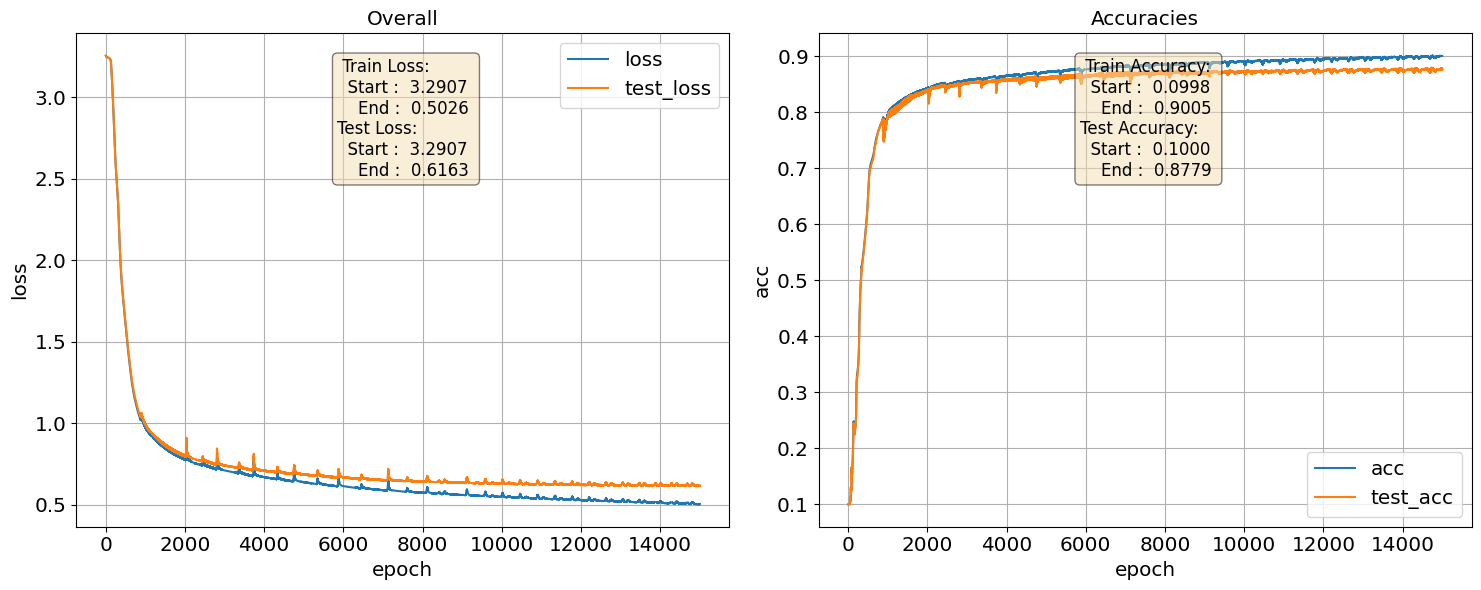

In [30]:
if trainModel:

    loss_df = pd.DataFrame(loss_hist)

    plot_hist(loss_df)

In [31]:
y_pred = predict(model, X_train_tensor).cpu()
y_train = torch.argmax(y_train_tensor, axis =1).cpu()
print('Accuracy score on Train Data :', accuracy_score(y_train, y_pred))

Accuracy score on Train Data : 0.9004833333333333


In [32]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      6000
           1       0.99      0.98      0.98      6000
           2       0.79      0.86      0.82      6000
           3       0.90      0.92      0.91      6000
           4       0.80      0.86      0.83      6000
           5       0.98      0.97      0.97      6000
           6       0.84      0.61      0.71      6000
           7       0.95      0.96      0.96      6000
           8       0.97      0.97      0.97      6000
           9       0.97      0.97      0.97      6000

    accuracy                           0.90     60000
   macro avg       0.90      0.90      0.90     60000
weighted avg       0.90      0.90      0.90     60000



In [33]:
y_pred = predict(model, X_test_tensor).cpu()

y_test = torch.argmax(y_test_tensor, axis =1).cpu()

print('Accuracy score on Train Data :', accuracy_score(y_test, y_pred))

Accuracy score on Train Data : 0.8779


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1000
           1       0.98      0.98      0.98      1000
           2       0.77      0.83      0.80      1000
           3       0.89      0.89      0.89      1000
           4       0.79      0.86      0.82      1000
           5       0.96      0.92      0.94      1000
           6       0.80      0.58      0.67      1000
           7       0.92      0.93      0.92      1000
           8       0.95      0.95      0.95      1000
           9       0.93      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [35]:
cm  = confusion_matrix(y_test, y_pred)
cm

array([[867,   3,  24,  32,   1,   2,  56,   0,  15,   0],
       [  2, 981,   2,  10,   2,   2,   1,   0,   0,   0],
       [ 15,   0, 830,  11,  94,   0,  43,   0,   7,   0],
       [ 29,  17,  12, 892,  34,   0,  11,   0,   5,   0],
       [  2,   1,  83,  22, 859,   0,  28,   0,   5,   0],
       [  1,   2,   1,   0,   0, 921,   0,  49,   5,  21],
       [170,   2, 113,  28,  90,   0, 583,   0,  13,   1],
       [  0,   0,   0,   0,   0,  22,   0, 931,   1,  46],
       [  7,   0,   9,   6,   6,   5,   7,   2, 955,   3],
       [  0,   0,   0,   0,   0,   9,   0,  31,   0, 960]])

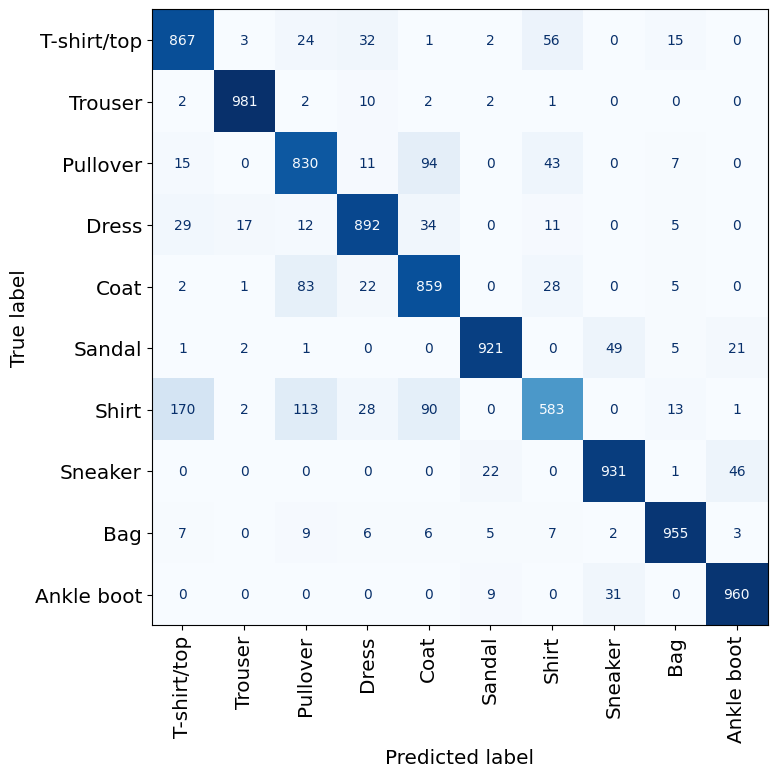

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels.values())

fig, ax = plt.subplots(figsize = (8,8))

disp.plot(ax = ax, cmap = 'Blues', colorbar=False, xticks_rotation='vertical')
plt.show();

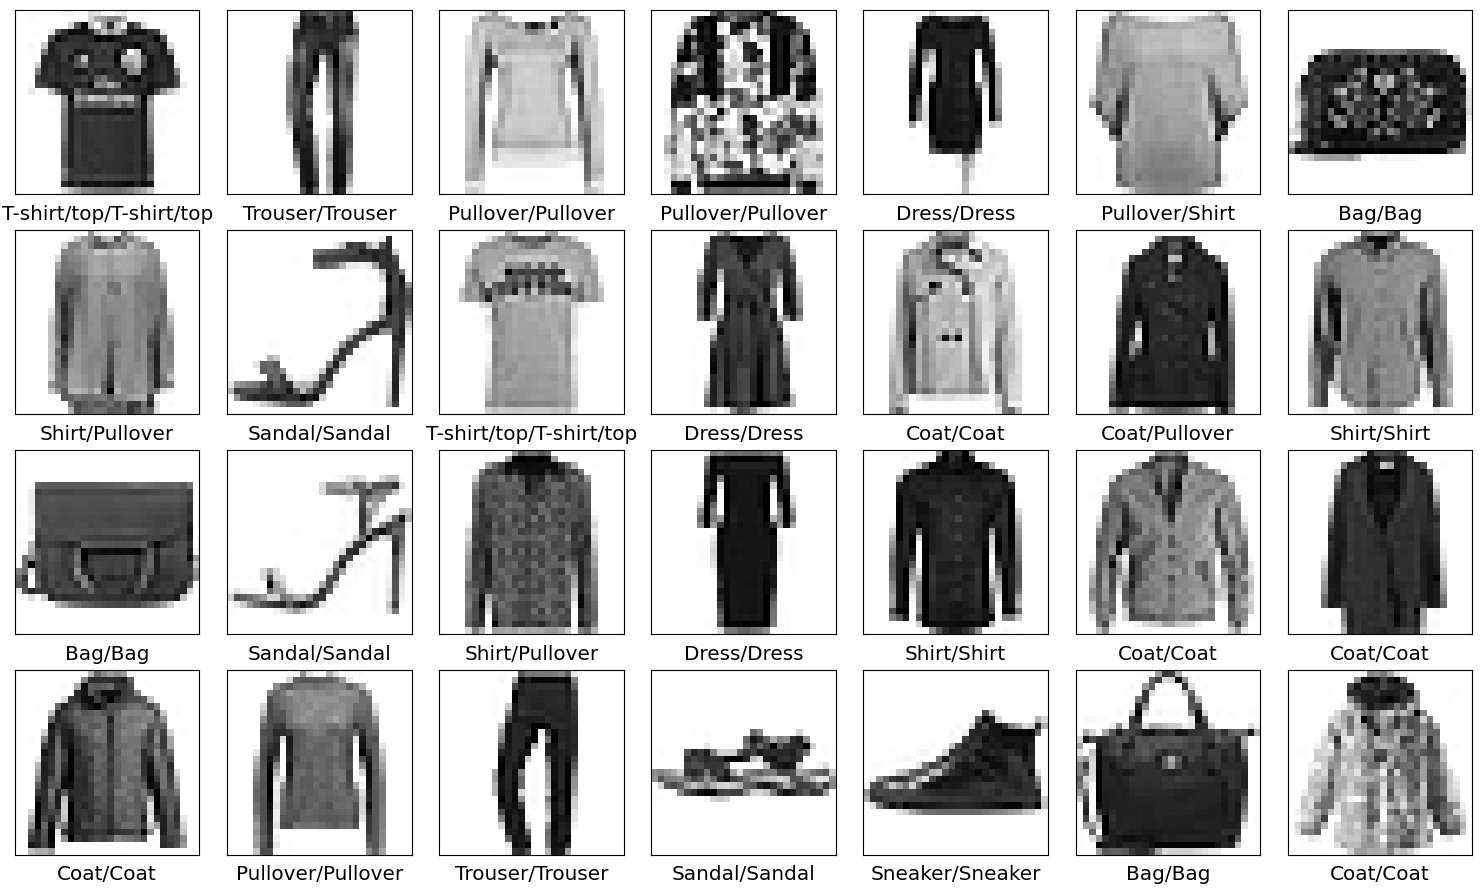

In [37]:
y_test_plot = test_df.label.to_numpy()

plt.figure(figsize=(15,9))
for i in range(28):
    plt.subplot(4,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28,28,1), cmap=plt.cm.binary)
    plt.xlabel(labels[y_test_plot[i]]+'/'+labels[y_pred[i].item()])
plt.tight_layout()
plt.show()